In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Advertising.csv')

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df=pd.DataFrame(data=data)

In [8]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


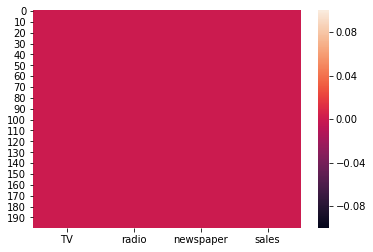

In [9]:
sns.heatmap(df.isnull())

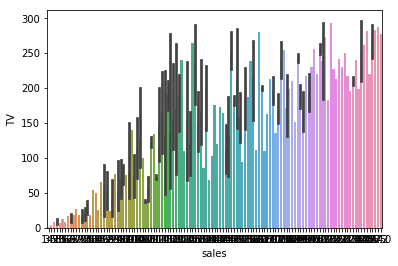

In [10]:
sns.barplot(x="sales",y="TV",data=df)

{'whiskers': [<matplotlib.lines.Line2D at 0x2628916f358>,
 'caps': [<matplotlib.lines.Line2D at 0x2628916f9e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x26289145ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x2628916fe10>],
 'fliers': [<matplotlib.lines.Line2D at 0x26289170400>],
 'means': []}

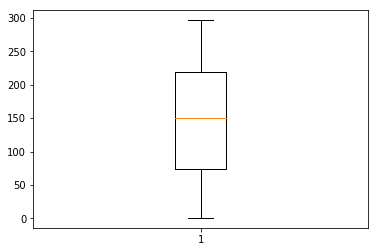

In [11]:
plt.boxplot(df['TV'])

{'whiskers': [<matplotlib.lines.Line2D at 0x26289198f60>,
 'caps': [<matplotlib.lines.Line2D at 0x262891a3908>,
 'boxes': [<matplotlib.lines.Line2D at 0x26289198e10>],
 'medians': [<matplotlib.lines.Line2D at 0x262891a3f98>],
 'fliers': [<matplotlib.lines.Line2D at 0x262891ad320>],
 'means': []}

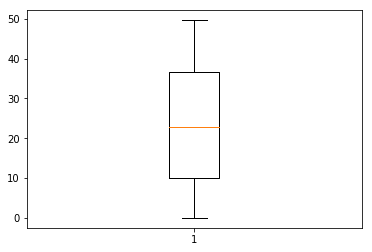

In [12]:
plt.boxplot(df['radio'])

{'whiskers': [<matplotlib.lines.Line2D at 0x262891f5c88>,
 'caps': [<matplotlib.lines.Line2D at 0x26289200358>,
 'boxes': [<matplotlib.lines.Line2D at 0x262891f5860>],
 'medians': [<matplotlib.lines.Line2D at 0x262892009e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x26289200d30>],
 'means': []}

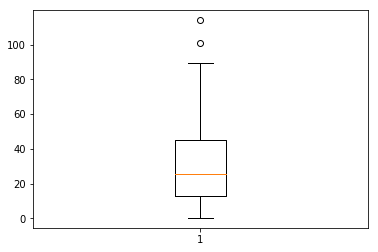

In [13]:
plt.boxplot(df['newspaper'])

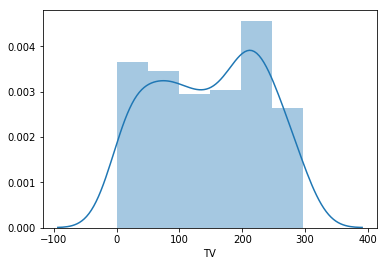

In [14]:
sns.distplot(df['TV'])

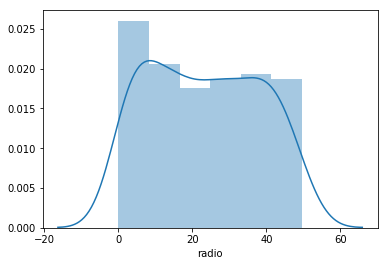

In [15]:
sns.distplot(df['radio'])

In [16]:
df.shape

(200, 4)

In [17]:
z=np.abs(zscore(df))
threshold=3
df_new=df[(z<3).all(axis=1)]
df_new.shape

(198, 4)

In [20]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [21]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


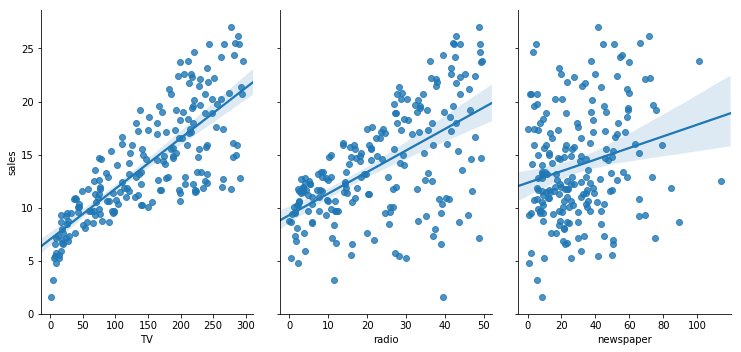

In [29]:
sns.pairplot(data,x_vars=['TV','radio','newspaper'],y_vars='sales',height=5,aspect=0.7,kind='reg')

as we can see from above graph TV has the most strong effect on sales so it is the most effective way.

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=47)
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.8924718415610547

In [31]:
pred=lr.predict(x_test)


In [32]:
mean_squared_error(y_test,pred)

2.7518346746364264

In [33]:
r2_score(y_test,pred)

0.8980149282465466

In [34]:
lr.coef_

array([0.04583745, 0.18668972, 0.00314962])

In [35]:
lr.intercept_

2.8714659352201153

In [36]:
td=np.array([120,20,30])
td=td.reshape(1,-1)

In [37]:
td

array([[120,  20,  30]])

In [38]:
lr.predict(td)

array([12.20024283])